# Deep Learning
*Description: Deep Learning or Deep Neural Network covers a set of both supervised and unsupervised learning methods for a wide range of problems, e.g. classification, regression and data synthesis.*

The notebook applies two different deep neural networks for classification on the MNIST dataset.

Algorithm Illustration by Code, supporting course material for Machine Learning, Morten Østergaard Nielsen, Aalborg University

## Contents
- Import modules
- Load data and preprocessing
- Create and Train FNN 
- Create and Train CNN
- Plot feature maps from a CNN

In [1]:
#Import modules
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.config.list_physical_devices('GPU')

[]

## Load Dataset and Normalization
First, we load the MNIST dateset from Tensorflow.Keras. In order to apply the data for training a CNN we have to normalize and reshape the images. 

Also, the class labels cannot be applied directly and therefore we construct one-hot vectors. A one-hot vector is an n-dimensional vector, where all entries are zero except one. The non-zero entry indicates the class label.

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

(x_trn, y_trn), (x_tst, y_tst) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_trn = x_trn.astype("float32") / 255
x_tst = x_tst.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_trn = np.expand_dims(x_trn, -1)
x_tst = np.expand_dims(x_tst, -1)
print("x_trn shape:", x_trn.shape)
print(x_trn.shape[0], "train samples")
print(x_tst.shape[0], "test samples")

# Generate One-Hot vectors
y_trn = keras.utils.to_categorical(y_trn, num_classes=10, dtype="float32")
y_tst = keras.utils.to_categorical(y_tst, num_classes=10, dtype="float32")

print("One-hot vector example", y_tst[0])


11490434/11490434 [==============================] - 1s 0us/step
x_trn shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
One-hot vector example [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Creating a FNN in Tensorflow
Creating a Deep Neural Network is relatively easy using Keras on top of Tensorflow. Let us create a Feed-forward Neural Network (FNN) for classification on MNIST. The FNN will have 5 hidden layers with ReLU activations. Note how the number of hidden units are chosen.

In order to use the images as input to the model we include a flatten layer, which stack the images into 784-dimensional vectors. Also, we need to include an input layer specifying the input shape, otherwise Tensorflow cannot create the model.

In [3]:
model = keras.Sequential([layers.Input(shape = input_shape),
                          layers.Flatten(),
                          layers.Dense(512, "relu"),
                          layers.Dense(256, "relu"),
                          layers.Dense(128, "relu"),
                          layers.Dense(64, "relu"),
                          layers.Dense(32, "relu"),
                          layers.Dense(num_classes, "softmax")],name="FNN")
model.summary()

Model: "FNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330     

### Training the FNN 
Training the FNN is also relatively simple, just like the models in scikit-learn. We will use a mini-batch size of 256 samples and 10 epochs. For this set-up, we choose the Adam optimizer and the pre-defined learning rate of 0.001. 

When training a model in Tensorflow, it will return a dictionary with the training histroy, e.g. training loss and accuracy.

In [4]:
batch_size = 256
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_trn, y_trn, batch_size=batch_size, epochs=epochs)

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.3328 - accuracy: 0.8992
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1048 - accuracy: 0.9686
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0674 - accuracy: 0.9789
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0471 - accuracy: 0.9850
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0358 - accuracy: 0.9884
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0301 - accuracy: 0.9902
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0226 - accuracy: 0.9924
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0198 - accuracy: 0.9935
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0174 - accuracy: 0.9939

### Plot the training curves
Let us plot the training loss and accuracy against the number of training epochs.

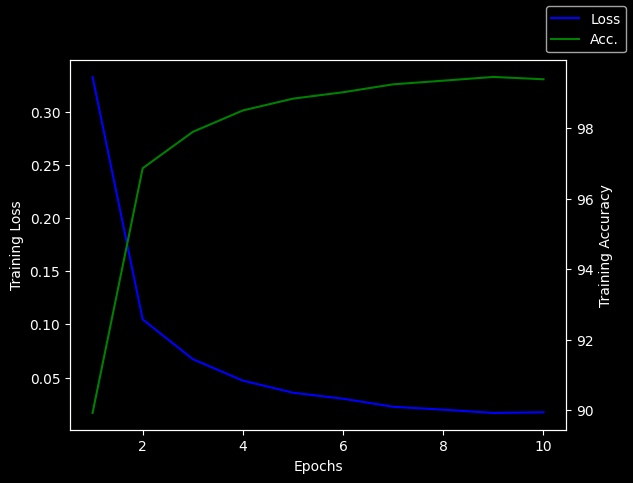

In [5]:
trn_loss = np.array(history.history["loss"])
trn_acc = np.array(history.history["accuracy"])

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(epochs)+1, trn_loss, 'b-', label = "Loss")
ax2.plot(np.arange(epochs)+1, 100*trn_acc, 'g-', label = "Acc.")

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training Loss")
ax2.set_ylabel("Training Accuracy")

fig.legend()

### Evaluate the FNN
From plotting the training loss, we can see it has converged to a local minimum (We are not guaranteed to find a global minimum). Let us evaluate the model on the test set and check its performance. 

In [6]:
score = model.evaluate(x_tst, y_tst, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1]*100)

Test loss: 0.10572319477796555
Test accuracy: 97.4399983882904


## Creating a CNN in Tensorflow
Let us create a Convolutional Neural Network (CNN) for the same classification task on MNIST. For this purpose, we choose the LeNet-5 architecture (LeCun et al. 1998).

Note the FNN has almost 10 times as many parameters as the CNN.

In [7]:
model = keras.Sequential([layers.Input(shape = input_shape),
                          layers.Conv2D(6, 5, padding = "same", activation = "relu"),
                          layers.AveragePooling2D(2),
                          layers.Conv2D(16, 5, activation = "relu"),
                          layers.AveragePooling2D(2),
                          layers.Conv2D(120, 5, activation = "relu"),
                          layers.Flatten(),
                          layers.Dense(84, activation = "relu"),
                          layers.Dense(num_classes, "softmax")],name="LeNet5")
model.summary()

Model: "LeNet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)               0    

### Training the CNN 
We use the same training procedure as for the FNN.

In [8]:
batch_size = 256
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_trn, y_trn, batch_size=batch_size, epochs=epochs)

Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 0.4848 - accuracy: 0.8645
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1386 - accuracy: 0.9579
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0909 - accuracy: 0.9724
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0715 - accuracy: 0.9779
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0581 - accuracy: 0.9821
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0516 - accuracy: 0.9839
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0449 - accuracy: 0.9858
Epoch 8/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0383 - accuracy: 0.9878
Epoch 9/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0349 - accuracy: 0.9892
Epoch 10/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0328 - accura

### Plot the training curves
Again, let us plot the training loss and accuracy against the number of training epochs.

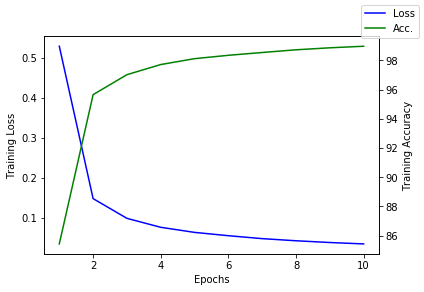

In [9]:
trn_loss = np.array(history.history["loss"])
trn_acc = np.array(history.history["accuracy"])

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(epochs)+1, trn_loss, 'b-', label = "Loss")
ax2.plot(np.arange(epochs)+1, 100*trn_acc, 'g-', label = "Acc.")

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training Loss")
ax2.set_ylabel("Training Accuracy")

fig.legend()

### Evaluate the CNN
Let us evaluate the model on the test set and check its performance.

In [10]:
score = model.evaluate(x_tst, y_tst, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1]*100)

Test loss: 0.03411194309592247
Test accuracy: 98.86999726295471


### Plot feature maps from the convolutional layers
Finally, let us study the feature maps from the first two convolutional layers.

In [11]:
def plot_encoding_maps(x, model, nr_layer):
    y = x.copy()   #Save a copy of the original images
    
    #Compute the forward porpagation up to and including the specific layer output
    for i, layer in enumerate(model.layers):
        x = layer(x)
        if i == nr_layer:
            name_layer = "Layer {}".format(i+1)
            break
    
    #Get the number of rows and columns for the figure
    n_rows = x.shape[0]
    n_cols = x.shape[-1] + 1
    
    #Create the figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (16,10))
    fig.suptitle(name_layer)
    for i in range(n_rows):
        for j in range(n_cols):
            ax = axes[i, j]
            if j == 0:
                #Plot the original images
                ax.imshow(y[i,:,:,0], cmap = "Greys")
                if i == 0:
                    ax.set_title("Input Image")
            else:
                #Plot the feature map
                ax.imshow(x[i, :, :, j-1], cmap = "magma")
                if i == 0 and j == (n_cols - 1)//2:
                    ax.set_title("Feature Maps")
    return

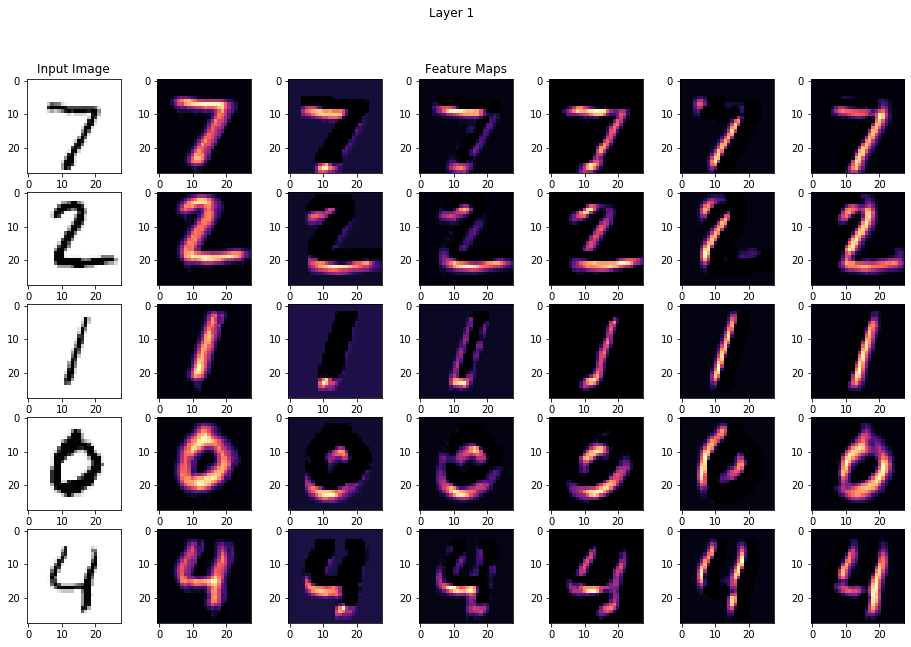

In [12]:
#Let us choose the first 5 images in the test set
x_sample = x_tst[:5]
plot_encoding_maps(x_sample, model, 0)

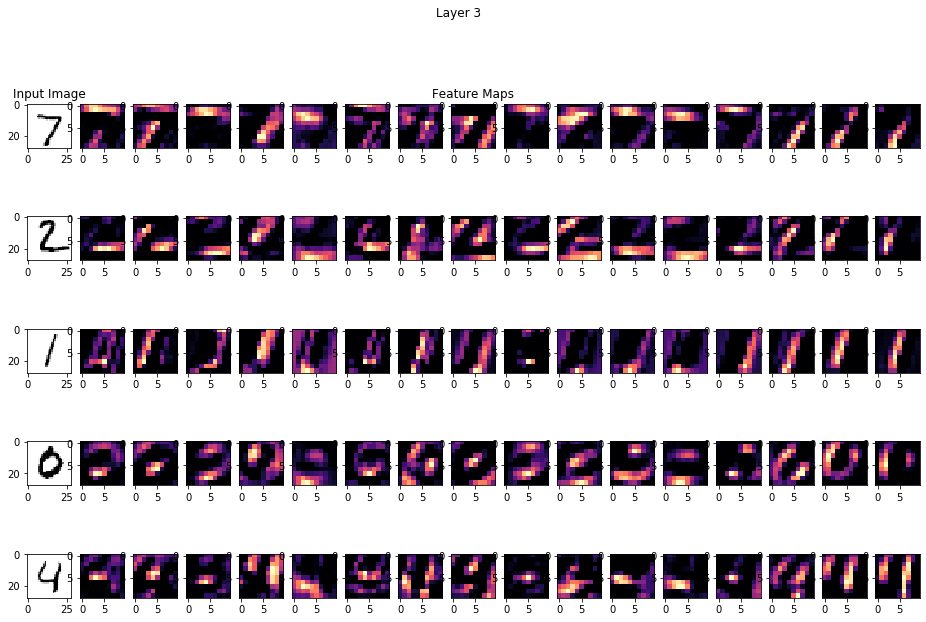

In [13]:
plot_encoding_maps(x_sample, model, 2)